In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = [1,2,3,7,5,6]
y = [0,0,0,1,1,1]

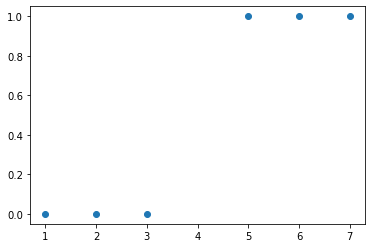

In [4]:
plt.scatter(x,y)
plt.show()

In [27]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [67]:
def cost_w_derivatives(w0,b0,x,y):
    xt = x.T
    # 求出每个样本关于线性回归方程的值
    z = w0@(xt)+b0
    # 求出每个样本关于sigmoid的值
    sigmoid_v = sigmoid(z)
    # 与真实y的差值
    l = sigmoid_v - y
    w_list = []
    for i in range(w0.shape[0]):
        xj = x[:,i:i+1]
        w_sum = sum(l@xj)
        w_list.append(w_sum/x.shape[0])
    w_new = np.array(w_list)
    return w_new
    

In [61]:
def cost_b_derivatives(w0,b0,x,y):
    xt = x.T
    # 求出每个样本关于线性回归方程的值
    z = w0@(xt)+b0
    # 求出每个样本关于sigmoid的值
    sigmoid_v = sigmoid(z)
    # 与真实y的差值
    l = sigmoid_v - y
    b_d = sum(l)/x.shape[0]
    return b_d

In [157]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_dw_tmp = cost_w_derivatives( w_tmp, b_tmp,X_tmp, y_tmp)
dj_db_tmp = cost_b_derivatives(w_tmp, b_tmp,X_tmp, y_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.49833339327869614, 0.49883942983996693]


In [141]:
def cost(w,b,x,y):
    xt = x.T
    z = w@(xt)+b
    sigmoid_v = sigmoid(z)
    log_f = np.log(sigmoid_v)
    y1 = -y*log_f
    log_1_f = np.log(1-sigmoid_v)
    y0 = -(1-y)*log_1_f
    l = y1+y0
    cost_v = sum(l)/x.shape[0]
    return cost_v

In [208]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) 
y_train = np.array([0, 0, 0, 1, 1, 1])    
w_tmp = np.array([0,0])
b_tmp = 0
a = 0.10

In [209]:
cost0 = cost(w_tmp,b_tmp,X_train,y_train)
minus = 1
num = 0
print(f'初始的cost值为{cost0}')
while minus > 0.000000000001:
    w_new = w_tmp - a*cost_w_derivatives(w_tmp,b_tmp,X_train,y_train)
    b = b_tmp - a*cost_b_derivatives(w_tmp,b_tmp,X_train,y_train)
    cost_new = cost(w_new,b,X_train,y_train)
    minus =  cost0-cost_new
    num = num +1
    w_tmp = w_new
    b_tmp = b
    cost0 = cost_new
    # print(1)
    if num%100000 == 0:
        print(f'w更新为{w_new}，b更新为{b}，cost更新为{cost_new}，差值为{minus}，次数为{num}')

初始的cost值为0.6931471805599453
w更新为[8.35313087 8.15226727]，b更新为-22.690605796630248，cost更新为0.0016974661879524142，差值为1.6987827404979158e-08，次数为100000
w更新为[9.27619027 9.07538354]，b更新为-25.23082987724368，cost更新为0.0008485418063091541，差值为4.242639944440976e-09，次数为200000
w更新为[9.81610713 9.61530879]，b更新为-26.71631157587406，cost更新为0.0005657292434654893，差值为1.885280794108532e-09，次数为300000
w更新为[10.19920091  9.99840294]，b更新为-27.770213127501556，cost更新为0.0004243352320789102，差值为1.0604590400795956e-09，次数为400000
w更新为[10.49636882 10.29556921]，b更新为-28.587679811188707，cost更新为0.00033949739970408165，差值为6.787193242868174e-10，次数为500000
w更新为[10.73918639 10.53838462]，b更新为-29.255608760054958，cost更新为0.0002829361987776887，差值为4.713576509359288e-10，次数为600000
w更新为[10.94449628 10.74369231]，b更新为-29.82034671717812，cost更新为0.00024253311177166852，差值为3.4632288386355313e-10，次数为700000
w更新为[11.12235202 10.92154593]，b更新为-30.309556336945214，cost更新为0.00021222909971419434，差值为2.6516802005571195e-10，次数为800000
w更新为[11.27923839 11.07843034]，

In [201]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(penalty='none')
logr.fit(X_train,y_train)
print(logr.coef_,logr.intercept_)


[[14.05759924 14.08676067]] [-38.52298636]
